In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("HousingData.csv")

In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97,22.5
375,19.60910,NaN,18.10,0.0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
107,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5,384,20.9,387.69,14.09,20.4
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.shape

(506, 14)

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df.shape

(506, 14)

<Axes: >

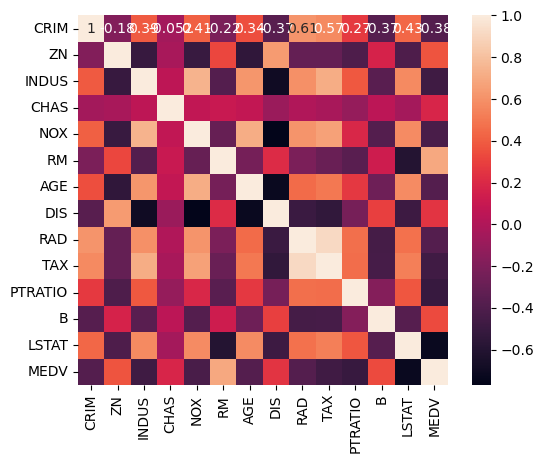

In [11]:
sns.heatmap(df.corr(),annot=True,square=True)

In [12]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'), 
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

C:\Users\Ashvini Mahajan\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.05)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 533.1266 - mae: 21.3765 - val_loss: 692.2536 - val_mae: 23.6014
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 525.5247 - mae: 20.9902 - val_loss: 597.3699 - val_mae: 21.5428
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 402.5235 - mae: 17.7549 - val_loss: 401.9524 - val_mae: 16.9609
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 239.8762 - mae: 13.0888 - val_loss: 161.7976 - val_mae: 9.4909
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78.0023 - mae: 7.1634 - val_loss: 132.1578 - val_mae: 7.8872
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.5533 - mae: 5.5273 - val_loss: 138.8774 - val_mae: 7.4619
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.2511 - mae: 4.2592 - val_loss: 122.5138 - val_mae: 7.0569
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2425 - mae: 3.4526 - val_loss: 104.6440 - val_mae: 6.3721
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━

In [19]:
loss,mae=model.evaluate(x_test,y_test,verbose=0)
print(f"Mean Squared Error",loss)
print(f"Mean Absolute Error", mae)

Mean Squared Error 20.633760452270508
Mean Absolute Error 2.7615065574645996


In [20]:
predictions = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [21]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: ",rmse)
# Compute R² Score
r2 = r2_score(y_test, predictions)
print(f"R2 Score : ",r2)

RMSE:  4.542439810782488
R2 Score :  0.793016139647997


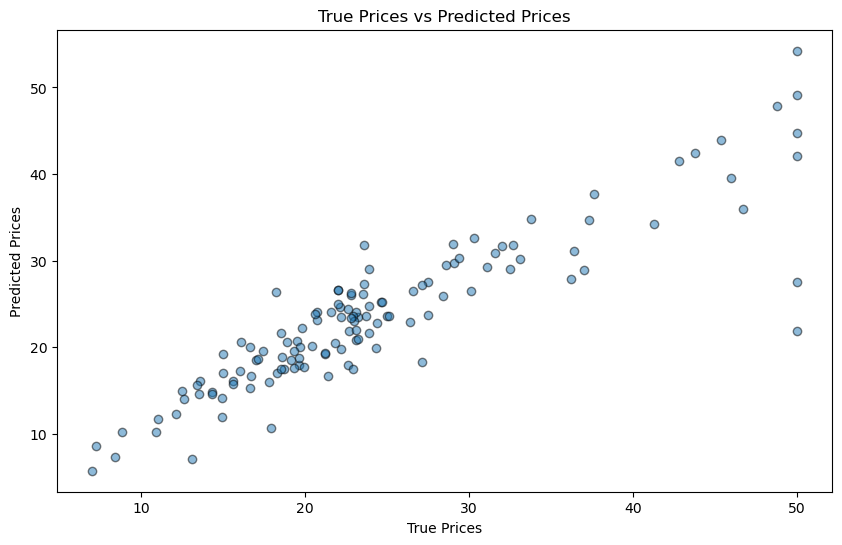

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions,alpha=0.5, edgecolors='k')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

In [38]:
# Predictions 

predicted_value = model.predict(x_test[0].reshape(1, -1))
print(f"Prediction for X_test[{0}]: {predicted_value[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction for X_test[0]: [25.945345]
